## Importando bibliotecas e conjunto de dados ##

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

In [121]:
data = pd.read_csv('ml_project1_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [122]:
for column in data.columns:
    print(column)

ID
Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


## Início Análise Exploratória ##

Verificando valores absurdos de idade

In [123]:
valor_minimo = min( 2024 - data['Year_Birth'])
valor_maximo = max( 2024 - data['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo} anos e o(a) cliente mais velho(a) tem {valor_maximo} anos.")


O(a) cliente mais novo tem 28 anos e o(a) cliente mais velho(a) tem 131 anos.


Verificando quais clientes têm mais de 100 anos de idade

In [124]:
data['Age'] = 2024 - data['Year_Birth']

# Filtrar clientes com mais de 100 anos
pessoas_mais_de_100 = data[data['Age'] > 100]

# Exibir as informações desses clientes
print(pessoas_mais_de_100[['ID', 'Age', 'Education', 'Marital_Status', 'Income']])

        ID  Age Education Marital_Status   Income
192   7829  124  2n Cycle       Divorced  36640.0
239  11004  131  2n Cycle         Single  60182.0
339   1150  125       PhD       Together  83532.0


Excluindo linhas de clientes com mais de 100 anos de idade

In [125]:
data_cleaned = data[data['Age'] <= 100]
valor_minimo_cleaned = min( 2024 - data_cleaned['Year_Birth'])
valor_maximo_cleaned = max( 2024 - data_cleaned['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo_cleaned} anos e o(a) cliente mais velho(a) tem {valor_maximo_cleaned} anos.")


O(a) cliente mais novo tem 28 anos e o(a) cliente mais velho(a) tem 84 anos.


Verificando se há repetição de 'ID' (identificação) de clientes

In [126]:
# Verificação de clientes únicos
# Se True - não temos ID's repetidos
# Se False - temos ID's repetidos
data['ID'].nunique() == data.shape[0]

True

Verificando dados faltantes

In [127]:
# Verificação de dados faltantes
missing_data = data.isnull().sum()
colunas_com_faltantes = missing_data[missing_data > 0]
print(f"A(s) coluna(s) com dados faltantes é(são): {colunas_com_faltantes}")

A(s) coluna(s) com dados faltantes é(são): Income    24
dtype: int64


In [128]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   int64 

C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1467068122.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_cleaned['Income'], bins=30, kde=True, palette=colors)


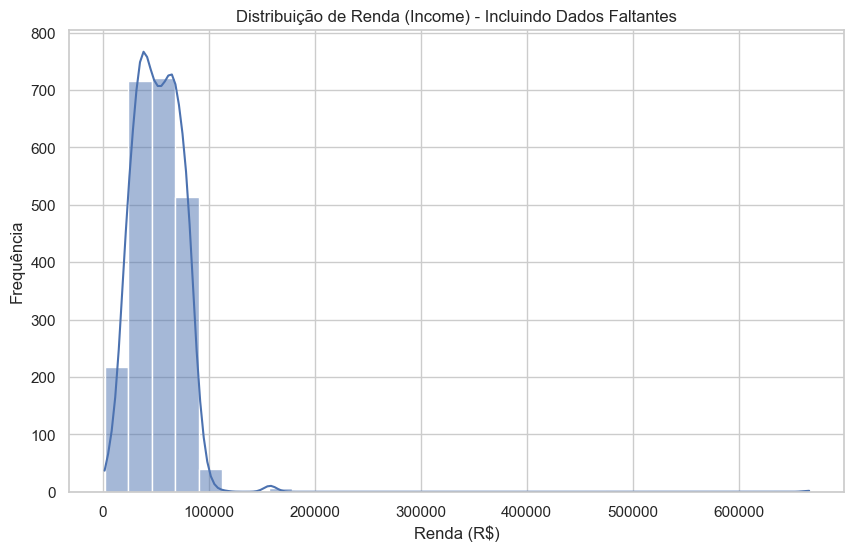

C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1467068122.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned['Income'], palette=colors)
C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1467068122.py:13: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(x=data_cleaned['Income'], palette=colors)


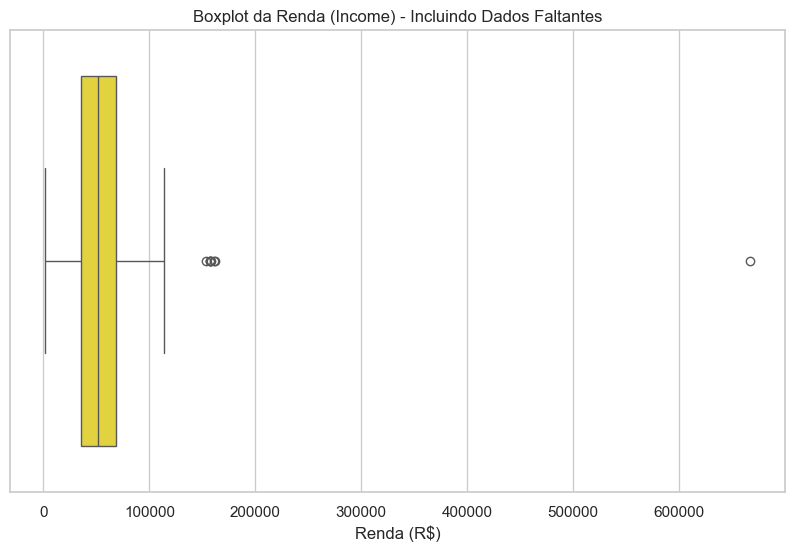

Algumas estatísticas da coluna 'Income': 
count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


In [129]:
# Análise de Distribuição para 'Income' incluindo valores faltantes

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Income'], bins=30, kde=True, palette=colors)
plt.title('Distribuição de Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Income'], palette=colors)
plt.title('Boxplot da Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.show()

# Estatísticas Descritivas
income_statistics = data_cleaned['Income'].describe()
print("Algumas estatísticas da coluna 'Income': ")
print(income_statistics)

Como a distribuição dos dados da coluna 'Income' é aproximadamente normal, vamos substituir os dados faltantes usando a mediana dos outros dados

In [130]:
# Calculando a mediana da coluna 'Income'
mediana_income = data_cleaned['Income'].median()

# Substituindo os valores faltantes em 'Income' pela mediana
data_cleaned['Income'].fillna(mediana_income, inplace=True)

# Verificando se ainda existem valores faltantes em 'Income'
print(f"Valores faltantes em 'Income' após a imputação: {data_cleaned['Income'].isnull().sum()}")


Valores faltantes em 'Income' após a imputação: 0


C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\483978148.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Income'].fillna(mediana_income, inplace=True)
C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\483978148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Income'].fillna(mediana_incom

## Análise do Perfil de Cliente ##

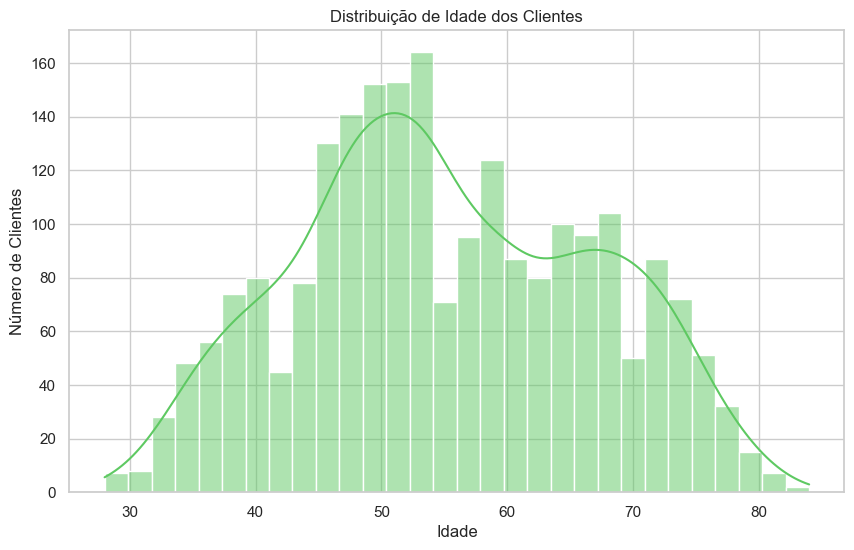

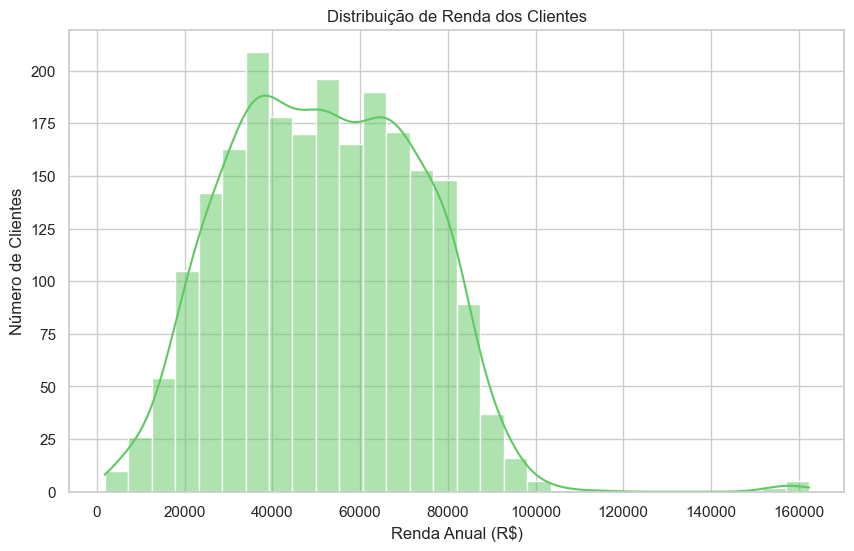

C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1674249480.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Education', order=data_cleaned['Education'].value_counts().index, palette=colors)


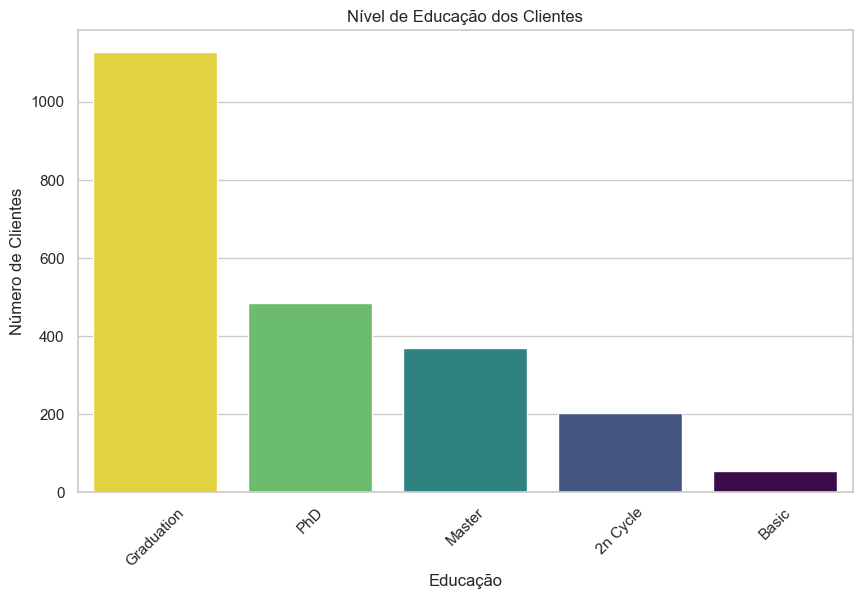

C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1674249480.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Marital_Status', order = data_cleaned['Marital_Status'].value_counts().index, palette=colors )
C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1674249480.py:30: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data_cleaned, x='Marital_Status', order = data_cleaned['Marital_Status'].value_counts().index, palette=colors )


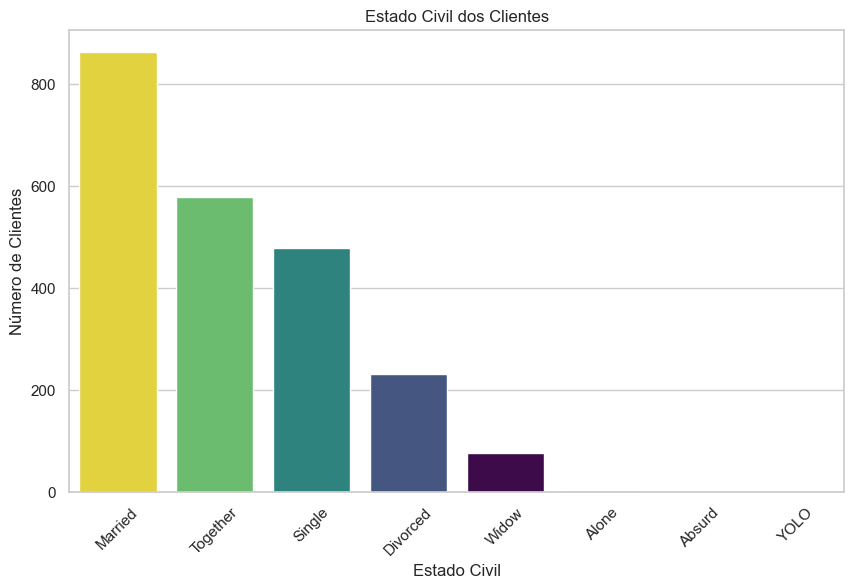

In [131]:
# Início das análises

# Plotando a distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], bins=30, kde=True, color=colors[1])
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.show()

# Plotando a distribuição de renda
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned[data_cleaned['Income'] < 200000]['Income'], bins=30, kde=True, color=colors[1])  # Filtrando valores extremamente altos para melhor visualização
plt.title('Distribuição de Renda dos Clientes')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Número de Clientes')
plt.show()

# Contagem de clientes por nível de educação
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Education', order=data_cleaned['Education'].value_counts().index, palette=colors)
plt.title('Nível de Educação dos Clientes')
plt.xlabel('Educação')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Contagem de clientes por estado civil
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Marital_Status', order = data_cleaned['Marital_Status'].value_counts().index, palette=colors )
plt.title('Estado Civil dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\952594570.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Total_Children', palette=colors2)
C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\952594570.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x='Total_Children', palette=colors2)


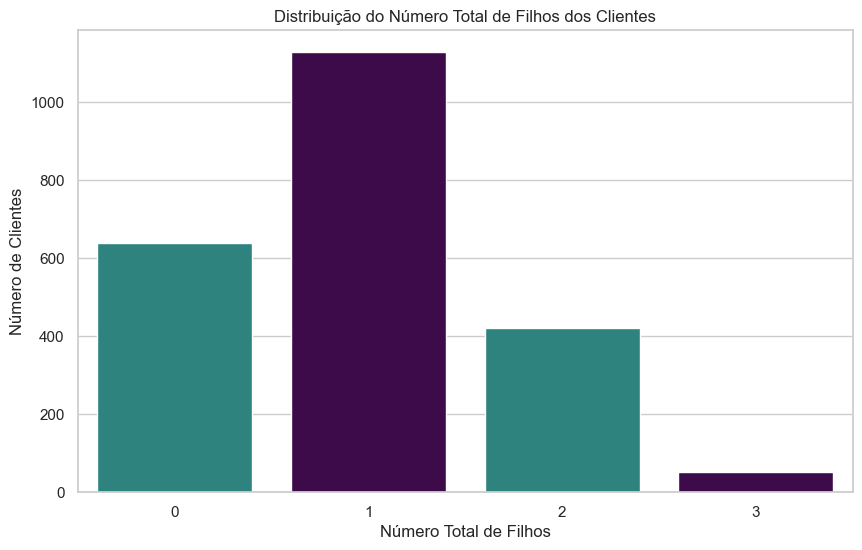

In [132]:
# Calculando o número total de filhos
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

colors2 = ['#21918c', '#440154']

# Plotando a distribuição do número total de filhos
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Total_Children', palette=colors2)
plt.title('Distribuição do Número Total de Filhos dos Clientes')
plt.xlabel('Número Total de Filhos')
plt.ylabel('Número de Clientes')
plt.show()

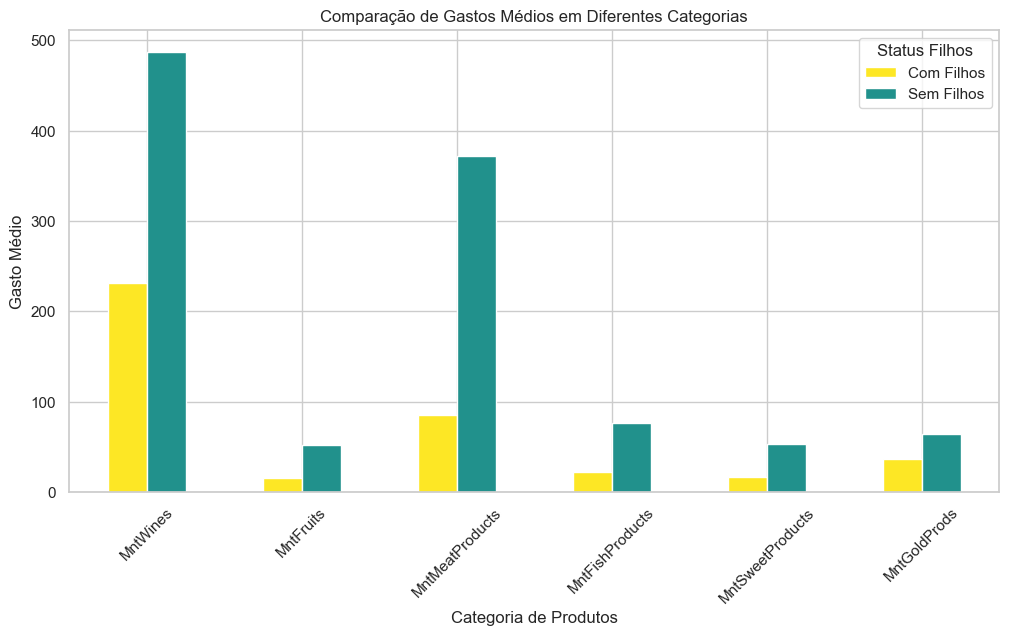

In [133]:
# Criando a coluna 'Status Filhos'
data['Status_Filhos'] = data.apply(lambda row: 'Com Filhos' if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 'Sem Filhos', axis=1)

colors2 = ['#fde725', '#21918c']

# Lista de categorias de produtos
categorias = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Comparando o gasto médio em diferentes categorias entre os dois grupos
gastos_medios = data.groupby('Status_Filhos')[categorias].mean()

# Plotando os resultados
gastos_medios.T.plot(kind='bar', figsize=(12, 6), color=colors2)
plt.title('Comparação de Gastos Médios em Diferentes Categorias')
plt.xlabel('Categoria de Produtos')
plt.ylabel('Gasto Médio')
plt.xticks(rotation=45)
plt.legend(title='Status Filhos')
plt.show()


C:\Users\MillerMonteiro\AppData\Local\Temp\ipykernel_11648\1527629667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Compra_Desconto'] = data_cleaned['NumDealsPurchases'].apply(lambda x: 'Comprou com Desconto' if x > 0 else 'Não Comprou com Desconto')


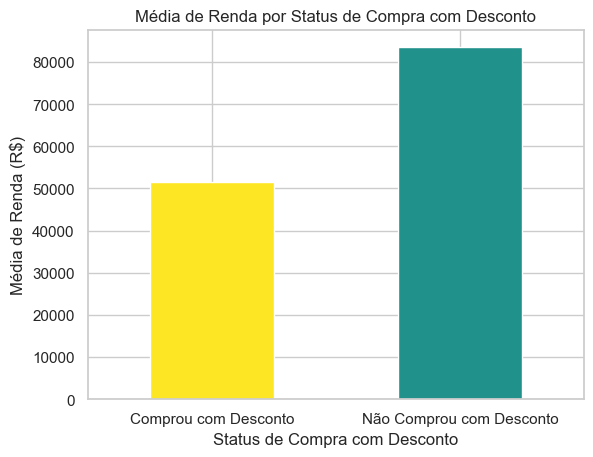

In [134]:
# Categorizar clientes com base em compras com desconto
data_cleaned['Compra_Desconto'] = data_cleaned['NumDealsPurchases'].apply(lambda x: 'Comprou com Desconto' if x > 0 else 'Não Comprou com Desconto')

# Calculando a média de renda para cada grupo
media_renda = data_cleaned.groupby('Compra_Desconto')['Income'].mean()

# Plotando o gráfico de barras com a paleta de cores
media_renda.plot(kind='bar', color=colors2)
plt.title('Média de Renda por Status de Compra com Desconto')
plt.xlabel('Status de Compra com Desconto')
plt.ylabel('Média de Renda (R$)')
plt.xticks(rotation=0)
plt.show()

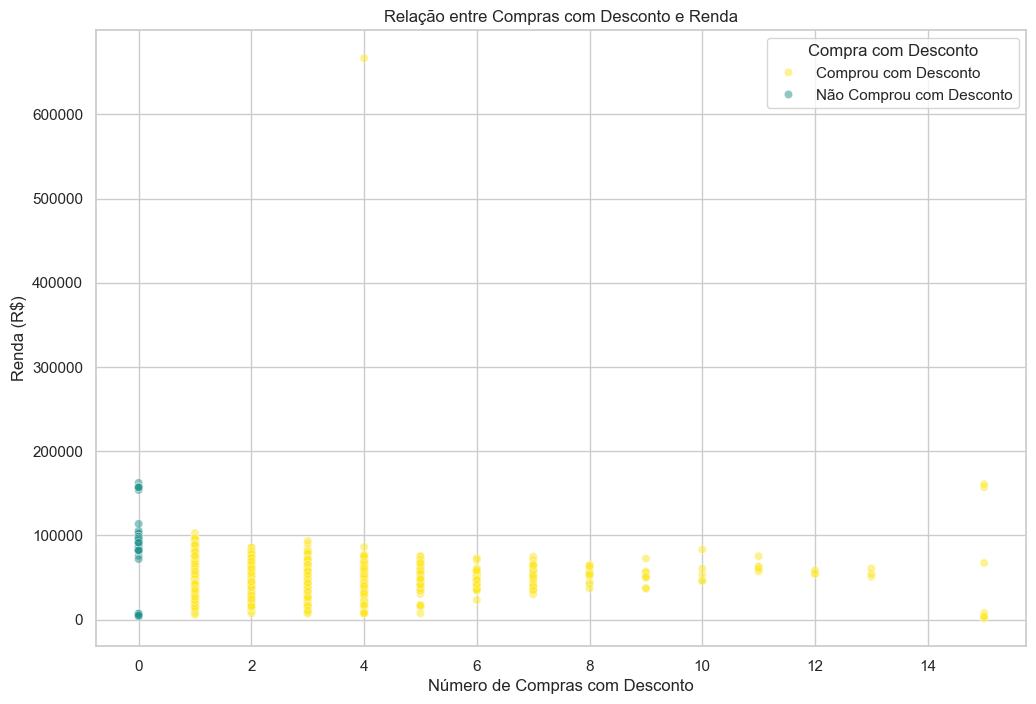

In [135]:
# Categorizar clientes com base em compras com desconto
data['Compra_Desconto'] = data['NumDealsPurchases'].apply(lambda x: 'Comprou com Desconto' if x > 0 else 'Não Comprou com Desconto')

# Definindo cores para os grupos
colors = {'Comprou com Desconto': colors2[0], 'Não Comprou com Desconto': colors2[1]}

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='NumDealsPurchases', y='Income', data=data, hue='Compra_Desconto', palette=colors, alpha=0.5)
plt.title('Relação entre Compras com Desconto e Renda')
plt.xlabel('Número de Compras com Desconto')
plt.ylabel('Renda (R$)')
plt.legend(title='Compra com Desconto')
plt.show()


### Clusterização - usando OHE

In [136]:
data_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Compra_Desconto
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,Comprou com Desconto
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,Comprou com Desconto
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,Comprou com Desconto
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,Comprou com Desconto
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,Comprou com Desconto


In [137]:
data_cleaned['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [138]:
import pandas as pd

In [139]:
data_hot = pd.get_dummies(data_cleaned['Marital_Status'])
data_encoded_m = pd.concat([data_cleaned, data_hot], axis=1)
data_encoded_m.drop('Marital_Status', axis=1, inplace=True)

In [140]:
data_encoded_m

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Compra_Desconto,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,67,Comprou com Desconto,False,False,False,False,True,False,False,False
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,70,Comprou com Desconto,False,False,False,False,True,False,False,False
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,59,Comprou com Desconto,False,False,False,False,False,True,False,False
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,40,Comprou com Desconto,False,False,False,False,False,True,False,False
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,43,Comprou com Desconto,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,2013-06-13,46,709,43,...,57,Comprou com Desconto,False,False,False,True,False,False,False,False
2236,4001,1946,PhD,64014.0,2,1,2014-06-10,56,406,0,...,78,Comprou com Desconto,False,False,False,False,False,True,False,False
2237,7270,1981,Graduation,56981.0,0,0,2014-01-25,91,908,48,...,43,Comprou com Desconto,False,False,True,False,False,False,False,False
2238,8235,1956,Master,69245.0,0,1,2014-01-24,8,428,30,...,68,Comprou com Desconto,False,False,False,False,False,True,False,False


In [141]:
data_cleaned['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [142]:
data_hot = pd.get_dummies(data_cleaned['Education'])
data_encoded_e = pd.concat([data_encoded_m, data_hot], axis=1)
data_encoded_e.drop('Education', axis=1, inplace=True)

In [143]:
data_cleaned['Compra_Desconto'].value_counts()

Compra_Desconto
Comprou com Desconto        2191
Não Comprou com Desconto      46
Name: count, dtype: int64

In [144]:
data_hot = pd.get_dummies(data_cleaned['Compra_Desconto'])
data_encoded = pd.concat([data_encoded_e, data_hot], axis=1)
data_encoded.drop('Compra_Desconto', axis=1, inplace=True)

In [145]:
data_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,False,True,False,False,True,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,False,True,False,False,True,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,True,False,False,False,False,True,False,False,True,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,True,False,False,False,False,True,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,False,False,False,False,False,True,False,False,True,False
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,True,False,False,False,False,False,False,True,True,False
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,False,False,False,False,False,True,False,False,True,False
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,True,False,False,False,False,False,True,False,True,False


In [146]:
booleanas = ['Absurd','Alone','Divorced','Married','Single','Together','Widow','YOLO','2n Cycle',
            'Basic','Graduation','Master','PhD','Comprou com Desconto','Não Comprou com Desconto']

In [147]:
data_encoded[booleanas] = data_encoded[booleanas].astype(int)

In [148]:
data_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,1,0,0,1,0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,1,0,0,1,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,1,0,0,0,0,1,0,0,1,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,1,0,0,0,0,1,0,0,1,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,1,0,0,1,0
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,1,0,0,0,0,0,0,1,1,0
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,0,1,0,0,1,0
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,1,0,0,0,0,0,1,0,1,0


In [149]:
data_encoded_ = data_encoded.drop(columns=['ID'])


In [150]:
data_encoded_.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,1,0,0,1,0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,1,0,0,1,0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,1,0,0,0,0,1,0,0,1,0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,1,0,0,0,0,1,0,0,1,0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,1,0


In [151]:
data_encoded_['Dt_Customer'] = pd.to_datetime(data_encoded_['Dt_Customer'])
data_encoded_['Days_Customer'] = (data_encoded_['Dt_Customer'] - data_encoded_['Dt_Customer'].min()).dt.days

In [152]:
data_encoded_.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto,Days_Customer
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,1,0,0,1,0,36
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,1,0,0,1,0,586
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,1,0,0,1,0,387
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,0,1,0,0,1,0,560
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,1,1,0,538


In [153]:
data_encoded_=data_encoded_.drop(columns=['Dt_Customer'])

In [154]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [155]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded_)


In [156]:
scaled_data

array([[0.30357143, 0.08483222, 0.        , ..., 1.        , 0.        ,
        0.05150215],
       [0.25      , 0.06709518, 0.5       , ..., 1.        , 0.        ,
        0.83834049],
       [0.44642857, 0.10509733, 0.        , ..., 1.        , 0.        ,
        0.55364807],
       ...,
       [0.73214286, 0.08309221, 0.        , ..., 1.        , 0.        ,
        0.77825465],
       [0.28571429, 0.10153609, 0.        , ..., 1.        , 0.        ,
        0.77682403],
       [0.25      , 0.07690815, 0.5       , ..., 1.        , 0.        ,
        0.11015737]])

### Scatterplot

### Inercias

In [177]:
def calc_inercias(X, lista_k, plot=True):
    lista_inercias = []
    
    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])
    
    for k in lista_k:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        
        labels_clusters = kmeans.labels_
        
        #calculo da inercia
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)
        
        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)
        
        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {inercia}")
            
            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()
        
    return lista_inercias

In [183]:
lista_k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lista_inercias = calc_inercias(scaled_data, lista_k, plot=True)

In [184]:
lista_inercias

[5017.562143805515,
 4523.30545577024,
 4204.989043464258,
 3983.1193784793945,
 3786.5887819183718,
 3515.567413689927,
 3443.2951972262563,
 3344.6845433871113,
 3197.7636183319546,
 3062.68524009476,
 3110.5850706187884,
 2934.5628642671377,
 2895.8612608323087,
 2748.9360780396723]

### Cotovelo

In [160]:
def plot_cotovelo(lista_k, lista_inercias):
    plt.figure(figsize =(8, 5))

    plt.title('Metodo do cotovelo')
    plt.plot(lista_k, lista_inercias, marker='o')

    plt.xlabel('k')
    plt.ylabel('Inércia (WCSS)')

    plt.show()

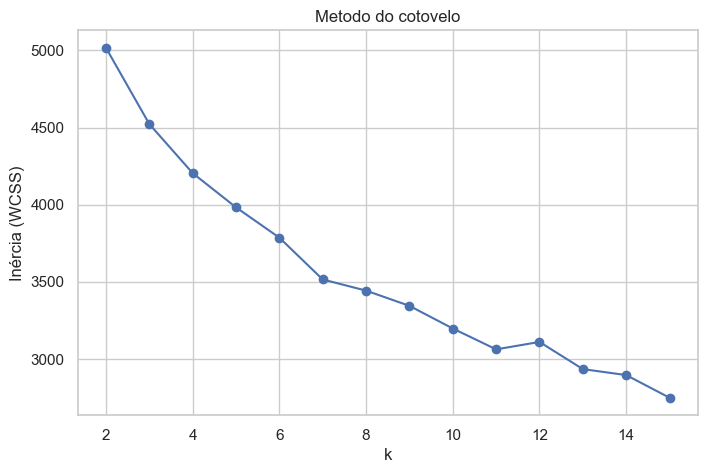

In [185]:
plot_cotovelo(lista_k, lista_inercias)

### Silhueta

In [162]:
from sklearn.metrics import silhouette_score

def calc_silhueta(X, lista_k, plot = True):
    
    lista_silhuetas = []
    
    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])
    
    for k in lista_k:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        
        labels_clusters = kmeans.labels_
        
        #calculo da inercia
        silhueta = silhouette_score(X_df, labels_clusters)
        lista_silhuetas.append(silhueta)
        
        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)
        
        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {silhueta}")
            
            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()
        
    return lista_silhuetas

In [163]:
def plot_silhueta(X, lista_k):
    
    lista_silhuetas = calc_silhueta(X, lista_k, plot = False)
    
    plt.figure(figsize =(8, 5))
    
    plt.title("Método da silhueta")
    
    plt.plot(lista_k, lista_silhuetas, marker='o')
    
    plt.xlabel("k (# de clusters)")
    plt.ylabel("mean silhouette score")
    
    plt.show()

In [164]:
lista_silhuetas = calc_silhueta(scaled_data, range(2, 15), plot=True)

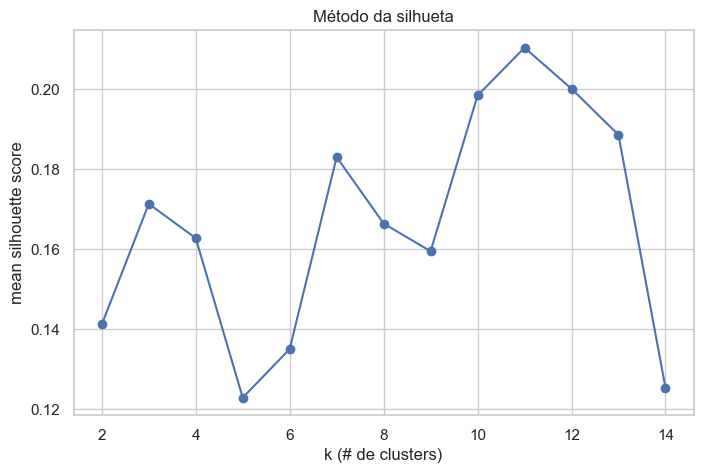

In [186]:
plot_silhueta(scaled_data, list(range(2, 15)))

In [187]:
estimador = KMeans(n_clusters =11, random_state = 42)
modelo = estimador.fit(scaled_data)

In [188]:
modelo.predict(scaled_data)
modelo.labels_

array([ 5,  5,  0, ..., 10,  6,  4])

In [189]:
df_scaled = pd.DataFrame(scaled_data, columns = data_encoded_.columns)
df_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto,Days_Customer
0,0.303571,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.051502
1,0.250000,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.838340
2,0.446429,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.553648
3,0.785714,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.801144
4,0.732143,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.769671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.482143,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.454936
2233,0.107143,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.972818
2234,0.732143,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.778255
2235,0.285714,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.776824


In [190]:
df_scaled['cluster'] = modelo.labels_
df_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,YOLO,2n Cycle,Basic,Graduation,Master,PhD,Comprou com Desconto,Não Comprou com Desconto,Days_Customer,cluster
0,0.303571,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.051502,5
1,0.250000,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.838340,5
2,0.446429,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.553648,0
3,0.785714,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.801144,0
4,0.732143,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.769671,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.482143,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.454936,1
2233,0.107143,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.972818,3
2234,0.732143,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.778255,10
2235,0.285714,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.776824,6


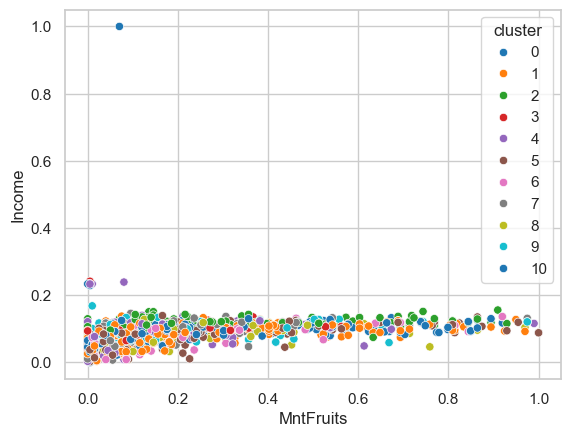

In [196]:
sns.scatterplot(data = df_scaled,
               x = 'MntFruits',
               y = 'Income',
               hue = 'cluster',
               palette ='tab10')
plt.show()
